<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Julia_prog_language.svg/1200px-Julia_prog_language.svg.png" width=400 height=400 style="padding-right: 100px"/>

# Introduction

- Julia is a high-level, high-performance dynamic programming language designed for numerical computing
- The goal is to have an expressive and easy-to-use language without sacrificing performance, and to be able to use the same language in prototyping and in production environments.
- First release in 2012.
- MIT License.
- The current stable version is 1.1.0

## Compiler

- Julia has an LLVM-based JIT compiler
- JIT description
- Julia code is interpreted and compiled to native machine code.
- bytecode
- compare with JS, pypy

In [1]:
f(x) = x * x

f (generic function with 1 method)

In [2]:
code_llvm(f, (Float64,))


;  @ In[1]:1 within `f'
define double @julia_f_12610(double) {
top:
; ┌ @ float.jl:399 within `*'
   %1 = fmul double %0, %0
; └
  ret double %1
}


In [3]:
code_native(f, (Float64,))

	.text
; ┌ @ In[1]:1 within `f'
; │┌ @ In[1]:1 within `*'
	vmulsd	%xmm0, %xmm0, %xmm0
; │└
	retq
	nopw	%cs:(%rax,%rax)
; └


# Features

- Syntax is mostly MATLAB and Python based.
- It combines features of procedural and functional languages, with some object-oriented features.
- It integrates libraries for linear algebra, statistics, signal processing and more.

- Static typing
- Type inference
- Multiple-dispatch
- Functions and types are values, and every value has a type. Functions and types are first class objects.

## Package manager

In [4]:
using Pkg
Pkg.add("DataFrames")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


## Integration with other languages

- C and Fortran code can be called via ccall.
- JavaCall
- PyCall
- RCall

### C

In [5]:
ccall((:clock, "libc"), Int32, ())

ErrorException: error compiling top-level scope: could not load library "libc"
/usr/lib/x86_64-linux-gnu/libc.so: invalid ELF header

### PyCall

In [61]:
Pkg.add("PyCall")
using PyCall
math = pyimport("math")
math.sin(math.pi / 4) - sin(pi / 4)

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
  [438e738f] + PyCall v1.91.2
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


0.0

In [62]:
nr = pyimport("numpy.random")
nr.rand(3,4)

3×4 Array{Float64,2}:
 0.764092  0.716042  0.0191186  0.526993
 0.887629  0.475218  0.0571767  0.959958
 0.981188  0.950618  0.932359   0.155707

## Integration with the shell

In [8]:
run(`pwd`)

/home/fede/dev/julia_talk


Process(`pwd`, ProcessExited(0))

## Vectors and matrices

In [9]:
x = rand(3,4)

3×4 Array{Float64,2}:
 0.895123  0.190034  0.243138  0.244677
 0.554888  0.754933  0.171735  0.169509
 0.705196  0.80484   0.552992  0.944279

### Indexing

In [10]:
x[1,:]

4-element Array{Float64,1}:
 0.8951225382569119 
 0.19003354878159384
 0.24313833361123316
 0.24467707774943315

In [11]:
x[:,1]

3-element Array{Float64,1}:
 0.8951225382569119
 0.5548883127303288
 0.7051957509671298

In [12]:
x[1,1]

0.8951225382569119

- Indexing (on the right side of an assignment ) makes a copy of the original array
- Assignment **does not** make a copy

### Linear algebra operations

In [13]:
using LinearAlgebra

In [14]:
x'

4×3 Adjoint{Float64,Array{Float64,2}}:
 0.895123  0.554888  0.705196
 0.190034  0.754933  0.80484 
 0.243138  0.171735  0.552992
 0.244677  0.169509  0.944279

In [15]:
x2 = x * x'

3×3 Array{Float64,2}:
 0.95634   0.723386  1.14968
 0.723386  0.936052  1.25394
 1.14968   1.25394   2.34253

In [16]:
det(x2)

0.21593468618264408

In [17]:
pinv(x2)

3×3 Array{Float64,2}:
  2.87296  -1.17131  -0.78301
 -1.17131   4.25357  -1.70203
 -0.78301  -1.70203   1.72226

In [18]:
row = rand(4)

4-element Array{Float64,1}:
 0.18965043210081478
 0.8184690514974178 
 0.18595968696262477
 0.6879241322980192 

In [19]:
row'

1×4 Adjoint{Float64,Array{Float64,1}}:
 0.18965  0.818469  0.18596  0.687924

In [20]:
row' * row

1.2136794916283284

### Horizontal and vertical concatenation

In [21]:
[1 2 3 4]

1×4 Array{Int64,2}:
 1  2  3  4

In [22]:
[1 ; 2 ; 3 ; 4]

4-element Array{Int64,1}:
 1
 2
 3
 4

In [23]:
[1 2 ; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [24]:
[1, 2, 3, 4]

4-element Array{Int64,1}:
 1
 2
 3
 4

### Vectorized operations

In [25]:
x = rand(4,3)

4×3 Array{Float64,2}:
 0.944273  0.0402751  0.0773343
 0.369959  0.912999   0.723876 
 0.334001  0.907853   0.491549 
 0.207822  0.454026   0.841827 

In [26]:
sum(x)

6.305793928275803

In [27]:
x^2

DimensionMismatch: DimensionMismatch("A has dimensions (4,3) but B has dimensions (4,3)")

In [28]:
x.^2

4×3 Array{Float64,2}:
 0.891651   0.00162209  0.00598059
 0.136869   0.833566    0.523996  
 0.111557   0.824196    0.241621  
 0.0431902  0.206139    0.708673  

In [29]:
x .> 0.5

4×3 BitArray{2}:
  true  false  false
 false   true   true
 false   true  false
 false  false   true

In [30]:
x[x .> 0.5]

5-element Array{Float64,1}:
 0.9442729295156409
 0.9129985579272173
 0.9078525615897752
 0.7238756297365581
 0.8418273060487265

# Type system


Julia has different kinds of types:
- Primitive types, like Int32, Int64, Bool, String Float64 and so on.
- Abstract types
- Composite types, both mutable and immutable
- Tuple types
- Union types

## Types and Inheritance

- Composite types are like records or classes in other languages, and they can hold values of different types. Immutable types are declared with the "struct" keyword and mutable types with the "mutable struct" keyword.
- In Julia, types form a hierarchy in which only the leaf nodes represent concrete types. There is no field inheritance as in object-oriented languages.
- "Interfaces" are defined by collections of functions that can be implemented for a certain type to make it work in a certain way. For example, it a type implements functions "start", "next" and "done" it can be used as in iterator, for a example in a for-each construct.
- "Any" is the root of the type hierarchy
- Types can be parameterized, to enable generic programming.


## Functions

- Operators are just functions with special syntax.
- Given a function call, Julia looks at compile-time for the most specific function definition available for the given argument types (More about this in section about Multiple dispatch).
- mutable structures like arrays are passed-by-sharing, which means they are not copied and changes in the callee affect the caller. Immutable values like integers cannot be modified, so they are passed-by-copy.

## Higher-order functions and anonymous functions

In [31]:
x = collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [32]:
map(e -> e ^ 2, x)

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [33]:
filter(e -> e % 2 == 0, x)

5-element Array{Int64,1}:
  2
  4
  6
  8
 10

In [34]:
foldl(+, x)

55

## Example

- Type definitions
- Function declarations
- Parametric types
- Multiple dispatch (explained later)
- Method extension
- String interpolation

In [39]:
abstract type Tree{T} end
struct Node{T} <: Tree{T} 
    left::Tree{T}
    right::Tree{T}
end
struct Leaf{T} <: Tree{T}
    value::T
end
struct Empty{T} <: Tree{T} end

#Type parameter can be omitted if it is not necessary
height(t::Node) = max(height(t.left), height(t.right)) + 1
height(t::Leaf) = 0
height(t::Empty) = -1

#Method size from Base has to be explicitly imported in order to be extended.
Base.size(t::Node) = size(t.left) + size(t.right) + 1
Base.size(t::Leaf) = 1
Base.size(t::Empty) = 0

# Note that functions can be declared either in short-form for one-line expressions or in long-form.
show(t::Tree) = show(t, 0)
show(t::Leaf, margin::Int) = println("$(repeat(" ", margin))Leaf($(t.value))")
show(t::Empty, margin::Int) = println("$(repeat(" ", margin))-")
function show(t::Node, margin::Int)
    println("$(repeat(" ", margin))Node")
    show(t.left, margin + 4)
    show(t.right, margin + 4)
end


tree = Node(Node(Leaf(1), Leaf(2)), Node(Leaf(3), Leaf(4)))
println(typeof(tree))
println("height = $(height(tree))")
println("size = $(size(tree))")
show(tree)

Node{Int64}
height = 2
size = 7
Node
    Node
        Leaf(1)
        Leaf(2)
    Node
        Leaf(3)
        Leaf(4)


## Immutability

Structs are immutable by default
If you want mutable structs you can get them by using `mutable struct`

An object with an immutable type is passed around (both in assignment statements and in function calls) by copying, whereas a mutable type is passed around by reference.

As a rule of thumb, if two objects of the same type with the same values on the same fields should be considered identical, then the type should be defined as immutable. Otherwise, if the values should be considered different objects because they can change independently, then the type should be defined as mutable.

## Multiple dispatch

- In single-dispatch languages, which method is invoked depends on the runtime type of the object that owns the method. 


```python
class Dog:
    def shout(self):
        print("GUAU")

class Cat:
    def shout(self):
        print("MIAU")

animals = [Dog(), Cat()]
for animal in animals:
    animal.shout()
```

- Double-dispatch (resolving the method based on two objects' types) is simulated by using several method calls (visitor pattern)

```python
class A:
    def f(self):
        print("A")

    def doSomething(self, other):
        other.doSomethingWithA(self)

    def doSomethingWithA(self, other):
        print("AA")

    def doSomethingWithB(self, other):
        print("AB")

class B:
    def f(self):
        print("B")

    def doSomething(self, other):
        other.doSomethingWithB(self)

    def doSomethingWithA(self, other):
        print("BA")

    def doSomethingWithB(self, other):
        print("BB")

xs = [A(), B()]
for x in xs:
    for y in xs:
        x.doSomething(y)
```

- Multiple dispatch consists in determining the correct method to invoked based on the types of all the arguments involved, not just the first one.
- In Julia, objects (values), **do not** own the methods (values) that operate on them.
- Instead, several functions with the same name provide different behaviors for different types. These different implementations are called "methods" of the same "function". This is analogous to the object-oriented concept of messages (a request for an operation) and methods (a concrete implementation of such request).
- Different methods for the same function can be examined by using the "methods" function 

In [40]:
methods(size)

# 94 methods for generic function "size":
[1] size(B::BitArray{1}) in Base at bitarray.jl:77
[2] size(B::BitArray{1}, d) in Base at bitarray.jl:81
[3] size(r::Core.Compiler.StmtRange) in Base.IRShow at show.jl:1561
[4] size(itr::Base.AsyncGenerator) in Base at asyncmap.jl:409
[5] size(zmsg::ZMQ.Message) in ZMQ at /home/fede/.julia/packages/ZMQ/ABGOx/src/message.jl:95
[6] size(g::Base.Generator) in Base at generator.jl:51
[7] size(t::Tuple, d) in Base at tuple.jl:22
[8] size(S::Base.Slice) in Base at indices.jl:328
[9] size(S::Base.IdentityUnitRange) in Base at indices.jl:360
[10] size(r::AbstractRange) in Base at range.jl:470
[11] size(x::Number) in Base at number.jl:62
[12] size(x::Number, d) in Base at number.jl:63
[13] size(x::Ref) in Base at refpointer.jl:38
[14] size(iter::LinearIndices) in Base at indices.jl:442
[15] size(a::Array{T,1} where T) in Base at array.jl:155
[16] size(a::Array{T,2} where T) in Base at array.jl:156
[17] size(a::Array{#s72,N} where #s72) where N in Base at array.jl:157
[18] size(a::Array, d) in Base at array.jl:154
[19] size(V::SubArray) in Base at subarray.jl:65
[20] size(A::Base.ReshapedArray) in Base at reshapedarray.jl:205
[21] size(a::Base.ReinterpretArray{T,0,S,A} where A<:AbstractArray{S,0} where S) where T in Base at reinterpretarray.jl:77
[22] size(a::Base.ReinterpretArray{T,N,S,A} where A<:AbstractArray{S,N} where N) where {T, S} in Base at reinterpretarray.jl:73
[23] size(B::BitArray) in Base at bitarray.jl:78
[24] size(s::Base.CodeUnits) in Base at strings/basic.jl:695
[25] size(iter::CartesianIndices) in Base.IteratorsMD at multidimensional.jl:356
[26] size(L::Base.LogicalIndex) in Base at multidimensional.jl:541
[27] size(A::PermutedDimsArray{T,N,perm,iperm,AA} where AA<:AbstractArray where iperm) where {T, N, perm} in Base.PermutedDimsArrays at permuteddimsarray.jl:49
[28] size(a::Random.UnsafeView) in Random at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Random/src/RNGs.jl:382
[29] size(v::Union{Adjoint{T,#s623}, Transpose{T,#s623}} where #s623<:(AbstractArray{T,1} where T) where T) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/adjtrans.jl:123
[30] size(A::Union{Adjoint{T,#s623}, Transpose{T,#s623}} where #s623<:(AbstractArray{T,2} where T) where T) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/adjtrans.jl:124
[31] size(A::SymTridiagonal) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/tridiag.jl:113
[32] size(A::SymTridiagonal, d::Integer) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/tridiag.jl:115
[33] size(M::Tridiagonal) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/tridiag.jl:466
[34] size(M::Tridiagonal, d::Integer) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/tridiag.jl:468
[35] size(A::LowerTriangular) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/triangular.jl:37
[36] size(A::LowerTriangular, d) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/triangular.jl:36
[37] size(A::UnitLowerTriangular) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/triangular.jl:37
[38] size(A::UnitLowerTriangular, d) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/triangular.jl:36
[39] size(A::UpperTriangular) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/triangular.jl:37
[40] size(A::UpperTriangular, d) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/s

In a function call, Julia looks at compile-time for the most specific definition of a function, i.e. the one whose types are the closest to the types of the arguments, and it will issue an error in case none is found.
Multiple dispatch allows to write more concise code, and it enables to define behavior for new types in a more simple way.

In [41]:
struct A end
struct B end

doSomething(x::A, y::A) = println("AA")
doSomething(x::A, y::B) = println("AB")
doSomething(x::B, y::A) = println("BA")
doSomething(x::B, y::B) = println("BB")

xs = [A(), B()]
for x in xs
    for y in xs
        doSomething(x,y)
    end
end

AA
AB
BA
BB


## DataFrames

In [ ]:
using Pkg
Pkg.add("DataFrames")
using DataFrames

In [ ]:
Pkg.add("RDatasets");
using RDatasets;
df = dataset("datasets", "iris")

In [44]:
size(df)

(150, 5)

In [45]:
first(df, 5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [46]:
last(df, 5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,6.7,3.0,5.2,2.3,virginica
2,6.3,2.5,5.0,1.9,virginica
3,6.5,3.0,5.2,2.0,virginica
4,6.2,3.4,5.4,2.3,virginica
5,5.9,3.0,5.1,1.8,virginica


In [47]:
names(df)

5-element Array{Symbol,1}:
 :SepalLength
 :SepalWidth 
 :PetalLength
 :PetalWidth 
 :Species    

In [48]:
df[:Species] # or df.Species

150-element CategoricalArray{String,1,UInt8}:
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 ⋮          
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [49]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,,,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,,,Float64
3,PetalLength,3.758,1.0,4.35,6.9,,,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,,,Float64
5,Species,,setosa,,virginica,3,,CategoricalString{UInt8}


selecting columns:

In [50]:
df[:, 2]

150-element Array{Float64,1}:
 3.5
 3.0
 3.2
 3.1
 3.6
 3.9
 3.4
 3.4
 2.9
 3.1
 3.7
 3.4
 3.0
 ⋮  
 3.0
 3.1
 3.1
 3.1
 2.7
 3.2
 3.3
 3.0
 2.5
 3.0
 3.4
 3.0

selecting rows:

In [51]:
df[1, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa


Boolean indexing

In [52]:
df[:Species] .== "setosa"

150-element BitArray{1}:
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
     ⋮
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false

In [53]:
df[df[:Species] .== "setosa", :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [54]:
groupby(df, :Species)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [55]:
using Statistics
mean_petal_lengths = by(df, :Species, mean = :PetalLength => mean, count = :PetalLength => length)

,Species,mean,count
,Categorical…,Float64,Int64
1,setosa,1.462,50
2,versicolor,4.26,50
3,virginica,5.552,50


In [64]:
Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("StatsPlots")
using Plots, StatsPlots

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [65]:
backends()

8-element Array{Symbol,1}:
 :pyplot      
 :unicodeplots
 :plotly      
 :plotlyjs    
 :gr          
 :pgfplots    
 :inspectdr   
 :hdf5        

In [66]:
pyplot()

Plots.PyPlotBackend()

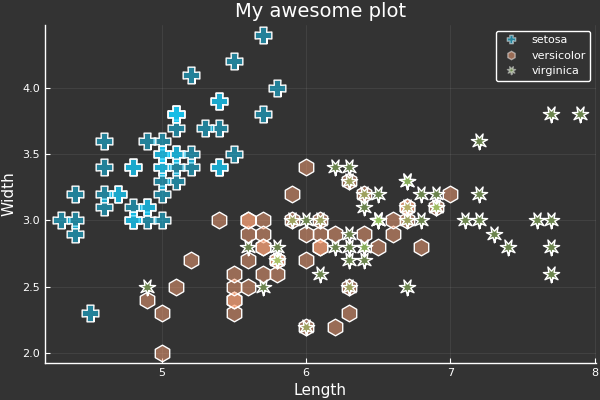

In [76]:
@df df scatter(:SepalLength, :SepalWidth, group=:Species,
        title = "My awesome plot",
        xlabel = "Length", ylabel = "Width",
        m=(0.5, [:cross :hex :star7], 12),
        bg=RGB(.2,.2,.2))

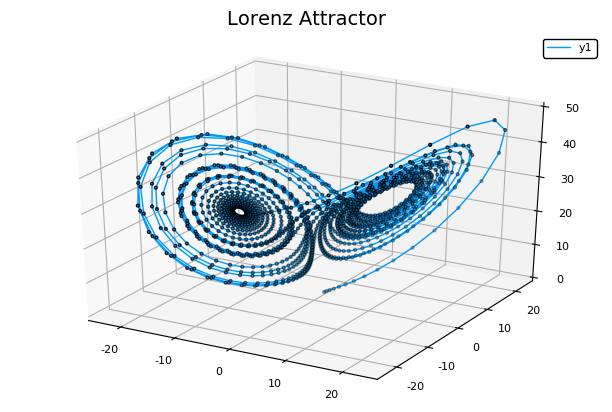

┌ Info: Saved animation to 
│   fn = /home/fede/dev/julia_talk/tmp.gif
└ @ Plots /home/fede/.julia/packages/Plots/47Tik/src/animation.jl:90


Plots.AnimatedGif("/home/fede/dev/julia_talk/tmp.gif")

In [77]:
# define the Lorenz attractor
mutable struct Lorenz
    dt; σ; ρ; β; x; y; z
end

function step!(l::Lorenz)
    dx = l.σ*(l.y - l.x)       ; l.x += l.dt * dx
    dy = l.x*(l.ρ - l.z) - l.y ; l.y += l.dt * dy
    dz = l.x*l.y - l.β*l.z     ; l.z += l.dt * dz
end

attractor = Lorenz((dt = 0.02, σ = 10., ρ = 28., β = 8//3, x = 1., y = 1., z = 1.)...)


# initialize a 3D plot with 1 empty series
plt = plot3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                title = "Lorenz Attractor", marker = 2)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

# TLDR:

- High-level
- High-performance 
- Designed for numerical computing
- Interoperability with Python, C
- Static typing, Type inference
- Multidimensional arrays "numpy built in"
- Multiple-dispatch
- Lots of Data Science packages built by the scientific community

## Links

https://julialang.org/

Tutorials:  
http://ucidatascienceinitiative.github.io/IntroToJulia/  
https://github.com/scidom/StatsLearningByExample.jl  
http://www.breloff.com/JuliaML-and-Plots/  
https://lectures.quantecon.org/jl/julia_plots.html#plotsjl-jl  
https://en.wikibooks.org/wiki/Introducing_Julia/Plotting

Articles:  
http://ucidatascienceinitiative.github.io/IntroToJulia/Html/WhyJulia  
http://www.stochasticlifestyle.com/7-julia-gotchas-handle/  
https://arstechnica.com/science/2014/05/scientific-computings-future-can-any-coding-language-top-a-1950s-behemoth/  
http://www.admin-magazine.com/HPC/Articles/Julia-A-New-Language-For-Technical-Computing  
http://www.admin-magazine.com/HPC/Articles/Parallel-Julia-Jumping-Right-In  
https://www.evanmiller.org/why-im-betting-on-julia.html  